In [2]:
import os
import time
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from glob import glob
from nfstream import NFStreamer

%matplotlib inline

plt.rcParams.update({
    'font.size': 16,
    'figure.figsize': [12, 8]
})

In [4]:
root_dir = "../data"
nrows=None

In [5]:
files = glob(os.path.join(root_dir, "*.csv.gz"))

all_dfs = []
for csv_file in tqdm(files, total=len(files)):
    all_dfs.append(pd.read_csv(csv_file, nrows=nrows))
    
all_df = pd.concat(all_dfs).sort_values("bidirectional_first_seen_ms").reset_index(drop=1)

100%|██████████| 3/3 [00:05<00:00,  1.72s/it]


In [7]:
all_df["15mins_bins"] = all_df.bidirectional_first_seen_ms.apply(lambda x: x//900000)
all_df["15mins_bins"] = all_df["15mins_bins"] - all_df["15mins_bins"].min()

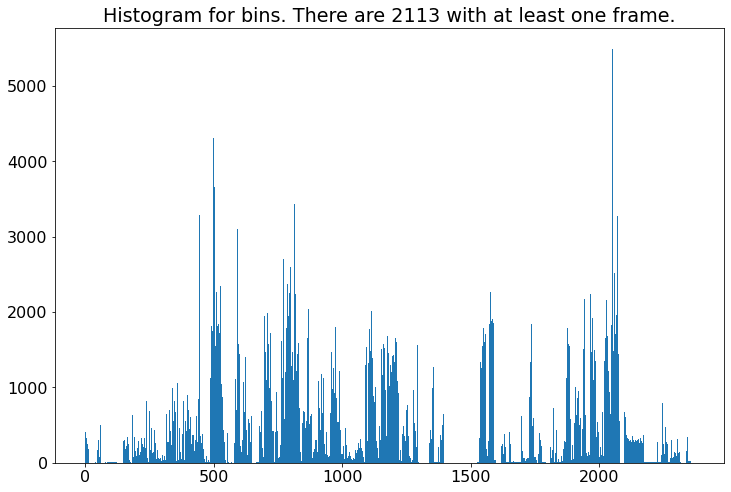

In [9]:
plt.title(f'Histogram for bins. There are {len(np.unique(all_df["15mins_bins"]))} with at least one frame.')
plt.hist(all_df["15mins_bins"].values, bins=all_df["15mins_bins"].max()+1)
plt.show()